# [NML24] Assignment 1: Classical Graph Machine Learning and Analysis

TAs: [Ali Hariri](ali.hariri@epfl.ch) and [Ortal Senouf](ortal.senouf@epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<student1>`, `<student2>`

## Instructions

> ⚠️ **Read carefully before starting**

**Deadline:**

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 1/3 of the overall assignments score.
* The total number of points is **59**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.


**Expected output:**

You will have coding and theoretical questions. Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
Sometimes we provide variable names, such as `x = ...`; do not change names and stick to hinted typing, as they will be reused later.
Within the solution space, you can declare any other variable of function that you might need, but anything outside these lines shall not be changed, or it will invalidate your answers.

Theoretical questions shall be answered in the following markdown cell. The first line will be
```markdown
**Your answer here:**
...
```

**Solutions:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported, unless explicitly stated.

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTex-equations

## Objective

The purpose of this assignment is to explore and compare classical graph analysis and learning methods for different tasks on graphs. This assignment covers the material provided in lectures 1-4.

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
seed = 42


# **Part 1: Graph Classification [25 pts]**

## Dataset
In this part we will work on the MUTAG dataset. The MUTAG dataset is a commonly used benchmark dataset in the field of graph classification and machine learning on graphs. It consists of 188 chemical compounds represented as graphs, where the nodes correspond to atoms and the edges represent chemical bonds between these atoms. Each compound (graph) is labeled with a binary attribute indicating its mutagenic effect on a bacterium, making the dataset suitable for binary classification tasks.

In [5]:
# Download the dataset
first_time= False 
if first_time:
    %%capture
    !wget https://www.chrsmrrs.com/graphkerneldatasets/MUTAG.zip
    !unzip MUTAG.zip

### Question 1.1: Graph building and feature extraction (7 pts)

**1.1.1 [1 pts]** Build the MUTAG graphs using the downloaded text files. `graphs` is a dictionary with the id's of the graphs as keys (running from 0-187) and the networkX graph objects as values.



In [3]:
# Build the graphs from edge list
def build_graphs_from_edges(edges_file: str, graph_ids_file: str) -> dict:
# Your solution here ###########################################################
  
  # extract datasets
  df_graph_indicator = pd.read_csv(graph_ids_file, names = ['graph_id'] ).to_numpy()
  df_adjacency = pd.read_csv(edges_file, names=['node1', 'node2']).to_numpy()
  
  unique_graph_ids = np.arange(1, 189) # graph index, ( 1 to 188)
  graphs_list = []
  
  for graph_id in unique_graph_ids:
    
    # Create a graph for each compound
    graph = nx.DiGraph() # not necessary direction
    
    # nodes belonging to the graph
    graph_node_indices =  (np.where(df_graph_indicator[:] == graph_id)[0])
    graph_node_indices  += 1 # to have the first node that starts with 1
    
    for i in range(len(df_adjacency)):
        if df_adjacency[i,0] in graph_node_indices:
            graph.add_edge(df_adjacency[i,0], df_adjacency[i,1])
  
    graphs_list.append(graph)
  
  # create the dictionary
  unique_graph_ids = unique_graph_ids-1
  graphs = dict(zip(list(unique_graph_ids), graphs_list))

 # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return graphs

In [22]:
# Build the graphs
graphs = build_graphs_from_edges('MUTAG/MUTAG_A.txt', 'MUTAG/MUTAG_graph_indicator.txt')

# Sanity check: check that the edges in the graph match the ones in the text files
print(graphs[0].edges)
print(len(graphs[0].nodes))

[(2, 1), (2, 3), (1, 2), (1, 6), (3, 2), (3, 4), (4, 3), (4, 5), (4, 10), (5, 4), (5, 6), (5, 7), (6, 5), (6, 1), (7, 5), (7, 8), (8, 7), (8, 9), (9, 8), (9, 10), (9, 14), (10, 9), (10, 4), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (13, 15), (14, 13), (14, 9), (15, 13), (15, 16), (15, 17), (16, 15), (17, 15)]
17


In [6]:
# Extract graph labels
with open('MUTAG/MUTAG_graph_labels.txt', 'r') as f_labels:
      graph_labels = [int(line.strip()) for line in f_labels]


In [7]:
# Random split to train & test sets
G_train, G_test, y_train, y_test = train_test_split(graphs, graph_labels, test_size=0.3, random_state=seed)

**1.1.2 [3 pts]** One possible way to compare molecules is by how complex is their structure. **Suggest** a graph property that you think could be inidicative of molecule complexity. **Motivate** your choice.

**Write** a function to extract the graph property. **Use** the given visualization code to plot the distribution of the property for the two different classes. **Answer:** Is it indicative of mutagenicity?




```markdown
**Your answer here:**
simple molecules are the ones that are very linear, and therefore don't have a lot of connections, between the atoms, one could therefore measure the molecule complexity by checking the node degree, which tells us the number of neighboring nodes 
nope falso dato che tutti devono raggiungere l'ottetto questo ci dice solo se ho piu elementi di carbonio o meno
```

In [8]:


def  node_degrees(G) -> dict:
    node_degrees = dict(G.degree() ) # number of edges connected to each node
    updated_node_degrees = {node: degree / 4 for node, degree in node_degrees.items()} # normilze, elements max 4 bonds
    tot_degrees = np.sum(list(updated_node_degrees.values())) # number of total bonds per molecule
    return tot_degrees

def cycles(G): # the one that works best
    "number of cycles in molecule graph"
    cycles = np.mean(list(nx.degree_centrality(G).values()))
    return cycles
    
def diameter(G):  # similar to node degrees in terms of plot
    "diameter"
    diamter = nx.diameter(G)
    return diamter

def betweenness_centrality(G): # not really useful
    "Measures the fraction of shortest paths that pass through each node"
    betweenness_centrality =  np.mean(list((nx.betweenness_centrality(G).values())))
    return betweenness_centrality


# def centrality(G):  for some reason this is not working in the def function
#     "Measures the fraction of shortest paths that pass through each node."
#     feature = []
#     for i in range(len(G)): 
#         feature.append(np.mean(list((nx.eigenvector_centrality(G[i])).values())))
#     return feature

# centrality = np.mean(list((nx.eigenvector_centrality(graphs[1])).values()))
# centrality # Measures the fraction of shortest paths that pass through each node.


In [26]:
def graph_property(G) -> float:
# Your solution here ###########################################################
  feature =cycles(G)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return feature

In [27]:
G_train_property = np.array([graph_property(G) for G in G_train])
print(G_train_property)

[0.39393939 0.30769231 0.4        0.21343874 0.19333333 0.35897436
 0.23157895 0.21645022 0.18666667 0.3        0.22857143 0.26470588
 0.18115942 0.21343874 0.39393939 0.30769231 0.18666667 0.24210526
 0.33333333 0.23157895 0.28333333 0.27941176 0.21343874 0.4
 0.19762846 0.4        0.39393939 0.26470588 0.21645022 0.27941176
 0.25730994 0.35897436 0.24210526 0.27941176 0.33333333 0.36363636
 0.18461538 0.17230769 0.28333333 0.36363636 0.28333333 0.19762846
 0.27941176 0.28333333 0.28333333 0.33333333 0.18803419 0.4
 0.18666667 0.25730994 0.21343874 0.35897436 0.20952381 0.3
 0.28333333 0.21645022 0.4        0.27941176 0.23391813 0.4
 0.39393939 0.4        0.21343874 0.35897436 0.27941176 0.23157895
 0.32380952 0.18972332 0.39393939 0.28333333 0.25730994 0.24210526
 0.24561404 0.27941176 0.20779221 0.28333333 0.36363636 0.27941176
 0.23157895 0.4        0.25730994 0.4        0.2055336  0.18115942
 0.21343874 0.39393939 0.35897436 0.23391813 0.21645022 0.4
 0.27941176 0.28333333 0.25730

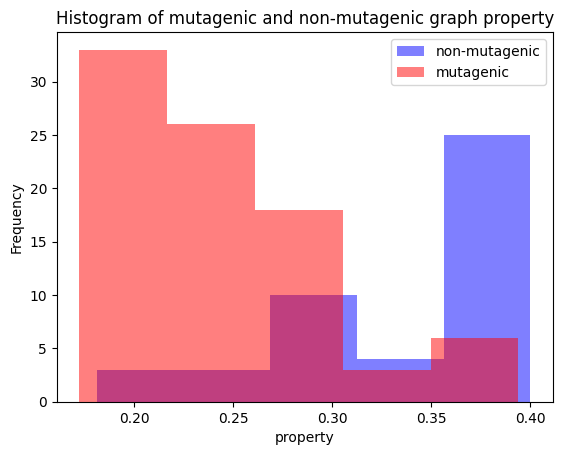

In [28]:
# Plotting the distribution of the property across mutagenic and non-mutagenic graphs
plt.hist(G_train_property[np.array(y_train)==-1], bins=5, color='blue', alpha=0.5, label='non-mutagenic')
plt.hist(G_train_property[np.array(y_train)==1], bins=5, color='red', alpha=0.5, label='mutagenic')

plt.legend(['non-mutagenic','mutagenic'])

plt.xlabel('property')
plt.ylabel('Frequency')
plt.title('Histogram of mutagenic and non-mutagenic graph property')

plt.show()

**1.1.3 [3 pts]** **Suggest** 2 more graph features and compute them for all the graphs in the training set. **Motivate** the choice of features. You may use networkX implementation of the features computations if exist. **Train** a classifier using the `sklearn` library on the suggested features and the feature from the previous question (3 in total). Report the results for the test set. Don't forget to import the chosen classifier from the library.   

```markdown
**Your answer here:**
...
```

In [12]:
# Your solution here ###########################################################
from sklearn.pipeline import Pipeline

# importing the classifier  ( ex. random forest)
from sklearn.ensemble import RandomForestClassifier # i don't know if this is the best classifier
from sklearn.metrics import accuracy_score

# features array 
F_train = [] #train features array
for i in range(len(G_train)): 
    F_train.append( [cycles(G_train[i]), node_degrees(G_train[i]), diameter(G_train[i])])
F_train = np.array(F_train)

F_test = [] # test features array
for i in range(len(G_test)): 
    F_test.append( [cycles(G_test[i]), node_degrees(G_test[i]), diameter(G_test[i])])

#don't forget to set random_state=seed
pipeline = Pipeline([
    ('feature_extraction', None),  
    ('classifier', RandomForestClassifier(random_state=seed))
])

# Fit the pipeline on the training data
pipeline.fit(F_train, y_train)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

y_pred = pipeline.predict(F_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with handcrafted graph features: {accuracy:.4f}")

Classification accuracy with handcrafted graph features: 0.9474


### Question 1.2: Graph kernels (18 pts)

### Graphlet Kernels

**1.2.1 [1 pts]** Read the following passage. It's from a study that investigated the MUTAG molecules and properties related to mutagenicity.
Given the results of the handcrafted features graph representation from the previous question, **suggest** what type of information that is important for the task at hand is not captured. **Answer:** would a kernel based method help in that case? **Explain**.


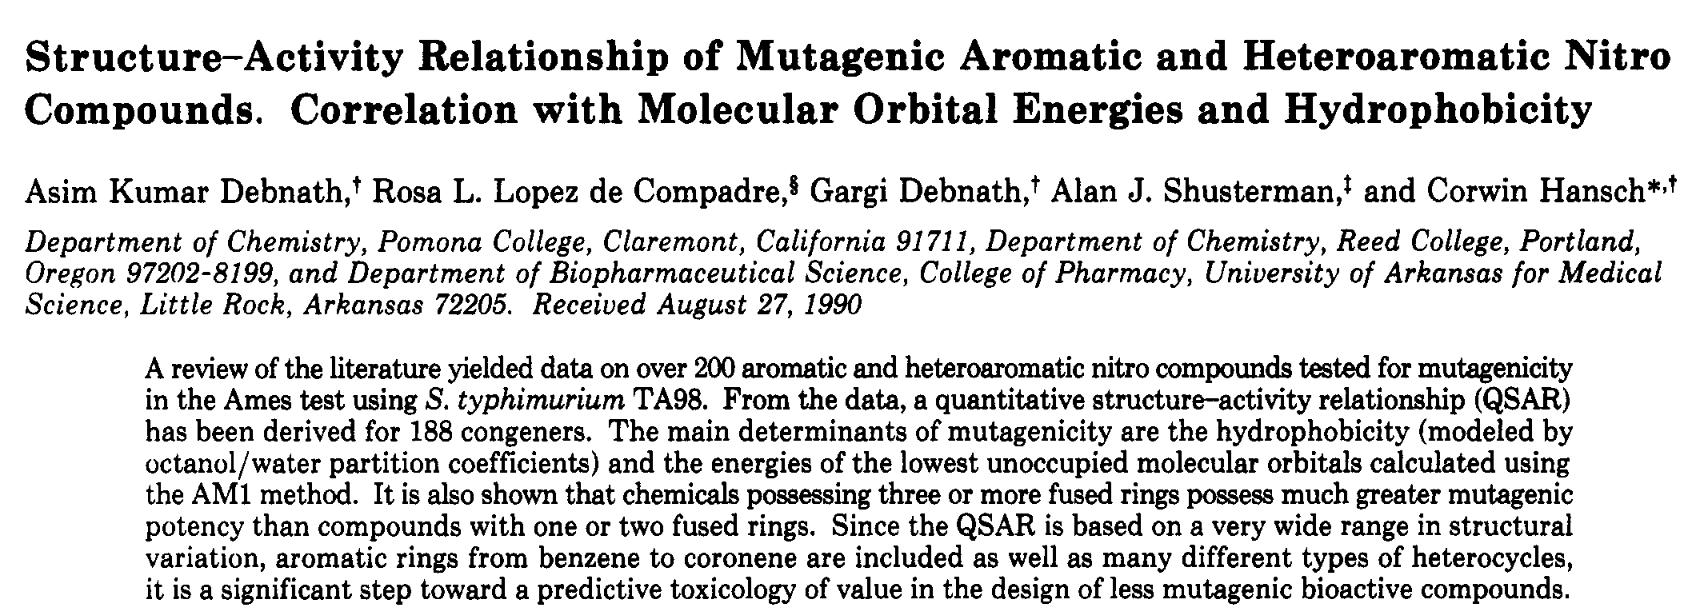


```markdown
**Your answer here:**
a feature that the nodes information can't capture is the shape of the molecules,it can measure the cycles but can't measure if there is some type of similarity between the molecules structures
might want to check if there are some hydrophobic bonds, 
or the number of cycles
...
```

**1.2.2 [2 pts]** Given the mutagenicity-relevant structures mentioned in the passage in q.1.1.2 is the relevant graphlet kernel computationally tractable? Explain by computing the complexity.*Hint: You can find some intuition in the following paper (section 3.1): https://proceedings.mlr.press/v5/shervashidze09a/shervashidze09a.pdf*
```markdown
**Your answer here:**
too much computational power since it is of O(n^k) , that's why it is required sampling
```

**1.2.3 [3 pts]** In the Servashidze et. al paper from the previous question they suggest to sample the graphlets (sections 3.1-3.2).

**Answer**

* What is the intuition behind the sampling?
* What would be a proper sample size for $k=3$ sized graphlets? **Estimate and explain**  



```markdown
**Your answer here:**
To compute the exact kernel one needs to count all graphlets of size k in the input graphs. A graph with n nodes has (n k ) or O(n^k) graphlets, which is prohibitely expensive to enumerate. Resort to random sampling and hope that the empirical distribution is close to the actual distribution. (sample complexity defines the number of samples needed to achieve a given confidence)



```

In [33]:
def sample_size(k: int, N: int, a: int, gamma=0.1, eps=0.1) -> float:
  '''
  k: graphlet size (#nodes)
  N: graph size (#nodes)
  a: number of unique (disconnected & connected) graphlets
  gamma: confidence level (default is 0.1)
  eps: margin of error (default is 0.1)
  
  return: n_samples: number of graphlets randomly sampled from graph
  '''
  # Your solution here #########################################################
  
  # it doesn't seem to be correlated with the graphlet size even though it should
  # in the function defined in the paper gamma is actually an indicator function ...
  
  n_samples = 2 *(np.log(2)*a + np.log(1/gamma) ) / (eps**2)
  # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return n_samples

In [14]:
import math # shouldn't be importing this

In [34]:
k = 3
# Your solution here #########################################################
Nodes = [] 
a = 14

N = np.max(Nodes)

# number of unique (disconnected & connected) graphlets, 
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
sampling = sample_size(k, N, a)# inputs are arrays have to fix
print(sampling)

ValueError: zero-size array to reduction operation maximum which has no identity

**1.2.4 [3 pts]** Define $k=3,5$ graphlet kernel using the `grakel` library (already imported). For $k=5$ use the smallest number of samples from the paper as appears in Table2.   

**Train** a classifier with the calculated kernel. Make sure you import the classifier from `sklearn`.

#### Code for $k=3$:

In [16]:
from sklearn.svm import SVC # support vector classifier ?

In [29]:
# Initialize the Graphlet Sampling kernel
# Note: You can adjust 'k' (size of graphlets) and 'sampling' (number of samples) as needed

k = 3

# Your solution here ###########################################################

n_samples = sample_size(k, N, a) # number of samples sufficient for convergence
n_samples = 2000 # max value above takes too long
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

graphlet_kernel = GraphKernel(kernel={"name": "graphlet_sampling", "k": k, "sampling": {"n_samples": n_samples}}, normalize=True, random_state=seed)

# Convert networkX graphs to grakel
G_train_gk = graph_from_networkx(G_train)
G_test_gk = graph_from_networkx(G_test)


# Your solution here ###########################################################
K_train = graphlet_kernel.fit_transform(G_train_gk) # kernel matrix
K_test = graphlet_kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(random_state=seed)#don't forget to set random_state=seed
clf.fit(K_train, y_train)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with Graphlet Sampling kernel: {accuracy:.4f}")

Classification accuracy with Graphlet Sampling kernel: 0.8246


#### Code for $k=5$:

In [30]:
k = 5

# Your solution here ###########################################################

# should recompute a since it is dependent on k?
n_samples = sample_size(k, N, a)
n_samples = 2000 # trial

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

graphlet_kernel = GraphKernel(kernel={"name": "graphlet_sampling", "k": k, "sampling": {"n_samples": n_samples}}, normalize=True, random_state=seed)

# Convert networkX graphs to grakel
G_train_gk = graph_from_networkx(G_train)
G_test_gk = graph_from_networkx(G_test)


# Your solution here ###########################################################
K_train = graphlet_kernel.fit_transform(G_train_gk) # kernel matrix
K_test = graphlet_kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(random_state=seed)#don't forget to set random_state=seed
clf.fit(K_train, y_train)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with Graphlet Sampling kernel: {accuracy:.4f}")

KeyboardInterrupt: 

**1.2.5 [1 pts]** Which graphlet kernel performed better? **Suggest an explanation**

```markdown
**Your answer here:**
the accuracy of the K = 5 is higher than the one for k = 3 that may be because
```

### Other Kernels

**1.2.6 [2 pts]** One of the downsides of the aforementioned implementation of graphlet kernels is that it doesn't take into account node labels. In the MUTAG dataset we have access to those labels. **Suggest** another kernel that can take into account the node labels and is also computationaly efficient. **Motivate** your choice.

```markdown
**Your answer here:**
Enumerate or sample unlabeled subgraphs of limited
size g from each graph (AISTATS 2009); scales as
O(ndg−1
).
```

In [31]:
# Let's add nodes labels to the G_train and G_test graphs
with open('MUTAG/MUTAG_node_labels.txt', 'r') as f_nodes:
      node_labels = [int(line.strip()) for line in f_nodes]

for G in G_train:
  for n in G.nodes:
    G.nodes[n]['label'] = node_labels[n-1]

for G in G_test:
  for n in G.nodes:
    G.nodes[n]['label'] = node_labels[n-1]

**1.2.7 [2 pts]**  **Define** the kernel in the code block below and **train** a classifier using it.

In [32]:
# Your solution here ###########################################################
# Initialize the kernel

# the dots indicate parameters of the kernel to be defined

kernel = GraphKernel(kernel=[{"name": "weisfeiler_lehman", "wl_iterations": 5, "sampling": {"n_samples": n_samples}}], normalize=True,random_state=seed)
# Adjust the number of WL iterations decided on weisfeiler_lehman kernel motivate

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_train_gk = graph_from_networkx(G_train, node_labels_tag='label')
G_test_gk = graph_from_networkx(G_test, node_labels_tag='label')


# Your solution here ###########################################################

# Compute the kernel matrix
K_train = kernel.fit_transform(G_train_gk)
K_test = kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(random_state=seed)#don't forget to set random_state=seed
clf.fit(K_train, y_train) # do i have to set the label if the kernel is already including it

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with chosen kernel: {accuracy:.4f}")

TypeError: WeisfeilerLehman.__init__() got an unexpected keyword argument 'wl_iterations'

**1.2.8 [3 pts]** Let's investigate the performance of the kernel without the node labels, i.e, its ability to capture structural similarity solely. In order to do that we first assign arbitrary labels (=1) to the nodes.

In the code block **define** again the kernel from the previous question and **train** a classifier.

In the text box **answer**: does the suggested kernel outperform the graphlet kernel? If it does, try to explain. If it doesn't, explain and try to suggest an improvement. You may search in the literature.

In [ ]:
# Let's add arbitrary nodes labels to factor out nodes information
with open('MUTAG/MUTAG_node_labels.txt', 'r') as f_nodes:
      node_labels = [int(line.strip()) for line in f_nodes]

for G in G_train:
  for n in G.nodes:
    G.nodes[n]['label'] = 1

for G in G_test:
  for n in G.nodes:
    G.nodes[n]['label'] = 1

In [ ]:
# Your solution here ###########################################################
# Initialize the kernel

# the dots indicate parameters of the kernel to be defined

kernel = GraphKernel(kernel=[{"name": "...", ...}, ...], normalize=True,random_state=seed)


# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
G_train_gk = graph_from_networkx(G_train, node_labels_tag='label')
G_test_gk = graph_from_networkx(G_test, node_labels_tag='label')


# Your solution here ###########################################################

# Compute the kernel matrix
K_train = kernel.fit_transform(G_train_gk)
K_test = kernel.transform(G_test_gk)

# Train a classifier on the training set
clf = SVC(random_state=seed)#don't forget to set random_state=seed
clf.fit(K_train, y_train) 
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Predict the labels of the test set
y_pred = clf.predict(K_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy with chosen kernel: {accuracy:.4f}")

```markdown
**Your answer here:**

...

```

**1.2.9 [1 pts]** Given the performance of the handcrafted features and the kernels in the MUTAG classification task, **suggest** another kernel that you expect to perform well and **explain** your choice. *Hint: you may go over the list of implemented kernels in the `grakel` library to get some intuition.*

```markdown
**Your answer here:**
...
```

# **Part 2: K-hop Selection [6 pts]**

# Objective:

In this part you will get an intuition about the usefulness of the power of the adjacency matrix and their relation to the receptive field of a graph. This is important for future work on graph representation learning if we deal with large graphs or graphs with distant dependencies among nodes, in which more than one-hop neighborhood needs to be considered.

**2.1 [3 pts]** Given a graph G consisting of *n* nodes, write a function that takes as input G, an integer k, and a randomly selected node *i*, and returns the nodes positioned at the k-th hop neighborhood of node *i*. You need to use the powers of the adjacency matrix as part of the solution.

In [ ]:
def k_hop_neighborhood(adj_matrix, node_index, k):
    # Your solution here ###########################################################
    ...

    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    return neighbors_at_k_hop,adj_power

# Generate a random graph using NetworkX
G = nx.fast_gnp_random_graph(20, 0.2)

# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Choose the node index and hop distance

"""
Example- Test with different values of node index and k below.
"""
node_index = 6
k = 2

# print(adj_matrix)

# Find nodes at the k-th hop neighborhood
neighborhood,power = k_hop_neighborhood(adj_matrix, node_index, k)
print(f"Nodes at {k}-th hop neighborhood of node {node_index}: {neighborhood}")

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', linewidths=0.5, edge_color='gray')
plt.title('Original Graph')
plt.show()

# Highlight the nodes at k-hop neighborhood
nodes_to_highlight = [node_index] + list(neighborhood)
node_colors = ['red' if node in nodes_to_highlight else 'skyblue' for node in range(len(adj_matrix))]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500, font_size=10, font_weight='bold', linewidths=0.5, edge_color='gray')
plt.title(f'{k}-hop Neighborhood of Node {node_index}')
plt.show()

**2.2 [3 pts]** Given the graph G above, define random node features of any size d (e.g d=32) for each node of the graph. Now extend the function above to select nodes from random hops relative to each node i, and sum the node embeddings to update node i's features. (i.e if the graph has 20 nodes, define 20 random vectors of size d=32. Then given a node A at position i, select nodes from 2 random hops, say 1 and 3. Now sum the random features of these nodes, and sum them again with node A's initial features)

In [ ]:
def k_hop_neighborhood_sampling(adj_matrix, node_index, k):
    # Your solution here ###########################################################

    ...

    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    return new_node_features

# Generate a random graph using NetworkX
G = nx.fast_gnp_random_graph(20, 0.2)

# Generate random node embeddings for each node in the graph

# Your solution here ###########################################################
features = ...

# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Choose the node index and hop distance

"""
Example- Test with different values of node index.
"""
node_index = 6
k = [1,3]

# **Part 3: Node Classification [28 pts]**

## Objective

The purpose of this assignment is to explore the usefulness of hand-crafted features and learned features with node2vec in a supervised learning setting applied to the tasks of **node-labelling**.

The dataset we will use for this assignment is the Polblogs dataset. The Political Blogs dataset from the “The Political Blogosphere and the 2004 US Election: Divided they Blog” paper. Polblogs is a graph with 1,490 vertices (representing political blogs) and 19,025 edges (links between blogs). The links are automatically extracted from a crawl of the front page of the blog. Each vertex receives a label indicating the political leaning of the blog: liberal or conservative.

In [3]:
# Download the package we will use

from IPython.display import clear_output
clear_output()

In [3]:
# Download the node2vec package we will use
# Run this cell to kill the current runtime after downloading 'node2vec', so a package version conflict about 'gensim' when using 'node2vec' can be avoided
# Run all again after commenting out this cell completely
run_cell = False
if run_cell:
  import os
  from IPython.display import clear_output
  !pip install node2vec
  clear_output()
  os.kill(os.getpid(), 9)


: 

In [ ]:
# !pip install node2vec

In [4]:
# import useful libraries

from node2vec import Node2Vec
%matplotlib inline
%env PYTHONHASHSEED=0
from IPython.display import clear_output
clear_output()

First of all, we can download the dataset and retrieve the characteristics of the network in the following cells.

In [5]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

from torch_geometric.datasets import PolBlogs
dataset = PolBlogs(root='./')


2.2.1+cpu


Extracting .\raw\polblogs.tar.gz
Processing...
Done!


In [6]:
num_feats=dataset.num_node_features
num_classes=dataset.num_classes

In [7]:
dataset[0]

Data(edge_index=[2, 19025], y=[1490], num_nodes=1490)

In [8]:
# Convert PyTorch Geometric graph to NetworkX graph
from torch_geometric.utils.convert import to_networkx
G = to_networkx(dataset[0],node_attrs='y')

In [9]:
# Print the number of nodes and edges within the dataset
number_of_nodes = G.number_of_nodes()
print('Number of nodes (teams): {}' .format(number_of_nodes))
number_of_edges = G.number_of_edges()
print('Number of edges (egular-season games): {}' .format(number_of_edges))

# Retrieve the labels of nodes in the dataset
values = nx.get_node_attributes(G, "y")
labels = np.unique([values[node] for node in G.nodes()])
print('The node labels are: {}' .format(labels))

Number of nodes (teams): 1490
Number of edges (egular-season games): 19025
The node labels are: [0 1]


In [10]:
# Load the nodes with each label into a set of node lists
node_list = {}
node_list = [[n for n, v in values.items() if v == l] for l in labels]

# Load the edges between nodes with same/different labels into lists
edge_list_same = [[(s, d) for (s, d) in G.edges() if s in node_list[l] and d in node_list[l]] for l in labels]
edge_list_same_all = []
for l in labels:
  edge_list_same_all += edge_list_same[l]
edge_list_diff = [(s, d) for (s, d) in G.edges() if (s, d) not in edge_list_same_all]

# Show the nodes within each class
print('The labels of each node are:')
for l in labels: print(node_list[l])

The labels of each node are:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

Now let's visualize dataset, i.e., the graph connectivity of the nodes, and the node labels.

c:\Users\giada\anaconda3\envs\network_machine_learning\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


 ...]

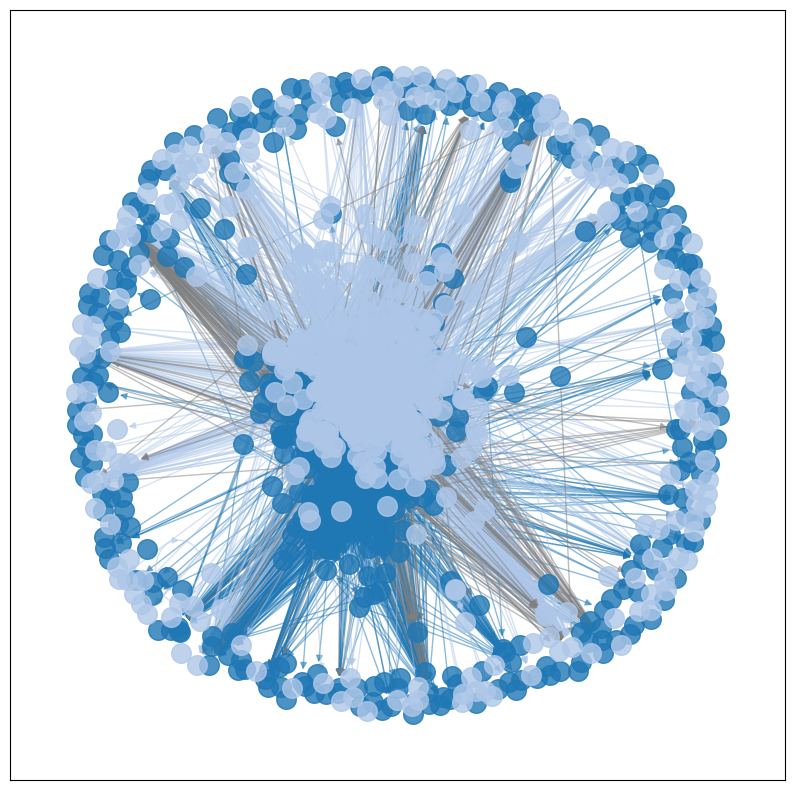

In [11]:
# Visualize the graph structure; nodes and edges within different classes (labels) are in different colors
cm = plt.cm.tab20
pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(10,10))

for l in labels:
  nx.draw_networkx_nodes(G, pos, nodelist= node_list[l], node_color=cm(l), node_size=200, alpha=0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edge_list_same[l], width=1.0, alpha=0.5, edge_color=cm(l))
nx.draw_networkx_edges(G, pos, edgelist = edge_list_diff, width=1.0, alpha=0.5, edge_color="tab:gray")

In this section, you will perform a node-labelling or classification task. You will do this in two different settings:

(a) Using traditional features of degree, eigenvector centrality,
  betweenness centrality,
  closeness centrality, and the
  clustering_coefficients, to train a an SVM classifier

(b)  Using node2vec features to train a an SVM classifier

You can use the sklearn library for this task.


### **3.1 On choice of node features [4 pts]**

(a) Can you think of 5 hand-crafted node features (discussed in the theory lectures) that would be the most helpful to the task of node prediction for this dataset? Please motivate your choice in few sentences.

(b) Between the hand-crafted features and node2vec features, which do you think would be better predictors? Please motivate your answer.


```markdown
**Your answer here:**
...
```

### **3.2: Data Extraction [3 pts]**


**3.2.1  Node Feature Extraction [2 pts]**
Extract the 5 traditional/hand-crafted features you chose in the earlier question and form a 5-dimensional feature vector for every node in the following cell.

In [ ]:
from networkx.algorithms.bipartite.centrality import betweenness_centrality
def node_feature_extraction(G):
  '''
  INPUT:
  G: the graph

  OUTPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: number of features)
  '''
# Your solution here ###########################################################

  nodedegree  = average_node_degree(G)

  #e-vector centrality

  betweenness_centrality =  np.mean(list((nx.betweenness_centrality(G).values()))) # Measures the fraction of shortest paths that pass through each node
  # i think i can use the functions as in the cell the function is being imported 
  # closeness centrality:

  # clustering coeff

  features = ### Your solution here
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return features

In [25]:
def average_node_degree(G):
    # Initialize a dictionary to store the number of edges for each node
    edges_per_node = {node: 0 for node in G.nodes()}

    # Iterate through the edges and count the number of edges for each node
    for edge in G.edges():
        edges_per_node[edge[0]] += 1
        edges_per_node[edge[1]] += 1

    # Calculate the average node degree
    average_node_degree = np.mean(list(edges_per_node.values()))
    return average_node_degree

In [ ]:
# e-vector centrality: 

# Get the adjacency matrix as a NumPy array
adjacency_matrix = nx.to_numpy_matrix(G)

# Compute the eigenvector centrality using NumPy
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)
# Find the eigenvector corresponding to the largest eigenvalue
max_eigenvalue_index = np.argmax(eigenvalues)
eigenvector_centrality = np.real(eigenvectors[:, max_eigenvalue_index])

# Normalize the eigenvector centrality values
eigenvector_centrality /= np.sum(eigenvector_centrality)

**3.2.2  Node Target and Label Extraction [1 pts]**
Extract the node targets and all their possible labels in the following cell.

In [ ]:
def node_target_extraction(G):
  '''
  INPUT:
  G: the graph

  OUTPUT:
  targets: target vector of dimensions (N, ) (N: number of samples)
  labels: vector of all possible labels for nodes in the graph
  '''

  targets = # Your solution here ###########################################################
  labels =  # Your solution here ###########################################################
  return targets, labels

Let's implement and test your feature and target extraction modules in the cell below.

In [ ]:
features_node = node_feature_extraction(G)
targets_node, labels_node = node_target_extraction(G)

### **3.3: Classification Module [5 pts]:**

Design a classifier function by integrating modules including:

1. **Data spliting**: Split dataset into train and test sets (50% - 50%). Make sure the data partition is stratified.

2. **Feature selection**: Implement a feature selection preprocessing step before training to use the k highest scored features for the classification task. You might find `SelectKBest` and `f_classif` in `sklearn.feature_selection` helpful.

3. **Normalization**: Normalize the features after feature selection and before training.

4. **Support-vector based classifier**. You might find `svm.SVC` helpful. Please set `class_weight='balanced'`.

5. **Evaluation**: Implement prediction on the test set. Show the performance using weighted f1 score, and display the confusion matrix. You might find `sklearn.metrics.ConfusionMatrixDisplay` helpful.

*** Please set all `random_state=0` and `seed=0` for reproducibility.**

** This function will be used both for node classification and link prediction in the following parts.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

def classifier(features, targets, labels, feature_selection=False, num_features=1, test_size=0.5, seed=0, verbose=False):
  '''
  INPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: number of features)
  targets: target vector of dimensions (N, ) (N: number of samples)
  labels: vector of all possible labels for nodes in the graph
  feature_selection: a flag for whether to use feature selction, bool
  num_features: number of features used from feature selesction
  test_size: please set to 0.5 for reproducibility
  seed: please set to 0 for reproducibility
  verbose: print and plot result or not, bool

  OUTPUT:
  cm: confusion matrix on the test set
  f1: weighted f1 score on the test set

  ** Please set all of the random_state=seed in following module **
  '''

  # Split the data into training and testing sets, with test_size=0.5
  # Your solution here ###########################################################
    #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  if feature_selection:
    ## Your solution here ###########################################################
    ## Build and train the ML model, including feature selection, normalization and Support Vector Classifier. Select the k highest relevant features for the classification.

    ## Print the scores for individual features.

    ##^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  else:
    ## Your solution here ###########################################################
    ## Build and train the ML model, including normalization and Support Vector Classifier.

    ##^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  # Your solution here ###########################################################
  # Use the model to predict the labels of the test data


  # Output the confusion matrix and weighted f1 score on the test set. Print the weighted f1 score and plot the confusion matrix if verbose

  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return cm, f1

### **3.4: Node Classification Using Handcrafted Features [4 pts]:**

**3.4.1  Node Classification without Feature Selection [3 pt]**

Train the classifier without feature selection (using all the 5 features) and show the output.

In [ ]:
cm, f1 = # Your solution here ###########################################################

Then train the classifier with feature selection with top 3 features and show the output including the feature scores.

In [ ]:

cm, f1 = # Your solution here ###########################################################

**3.4.2  Find the best number of features selected [1 pt]**
With respect to the weighted f1 score, which is the best number of K chosen for the classification performance on the test set? Show the results using different K into a plot and find the best number of K.

In [ ]:
# Plot the weighted f1 score using different number of best K features in a figure, and print out the best number of K
'''
  k_best: the best number of K with respect to weighted f1 score on the test set
'''
# Your solution here ###########################################################

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("The best K with respect to weighted f1 score is: {}".format(k_best))
print("The f1 score is: {}".format(max_f1))

**3.4.3  Explanations for the Best Features [1 pt]**
**Q:** What are the best top K features selected in your implementation? Could you please give an possible explanation for why they play important roles in our node classification task?

```markdown
**Your answer here:**
...
```



### **3.5: Node2vec features [11 pts]**

**3.5.1  Node2Vec Basics [1 pt]**

**Q:** Explain the main components of the Node2vec embedding and discuss in short the relevance of the parameters walk length, p, and q, used in the embedding.



```markdown
**Your answer here:**
...
```

**3.5.2 About node2vec parameters [3 pts]**

**Q:** As you know node2vec has two parameters p and q.
Which configuration of these parameters do you think best suits this task?
low/low, low/high, high/low, or high/high?

Please motivate your answer.


```markdown
**Your answer here:**
...
```


**3.5.3  Node2Vec Node Feature Extraction [1 pt]**

Extract the node2vec features of nodes using the `node2vec.Node2Vec`.

*** Please set `random_state=0` and `seed=0` for reproducibility.**




In [ ]:
def Node2Vec_node_feature_extraction(G, num_features=1, p=1.0, q=1.0, seed=0):
  '''
  INPUT:
  G: the graph
  num_features: dimension of node2vec embeddings, int
  p: float
  q: float
  seed: please always set to 0

  OUTPUT:
  features: feature matrix of dimensions (N, D) (N: number of samples; D: dimension of Node2Vec embeddings)
  '''

  #
  # Your solution here ###########################################################

  #^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  return features

**3.5.4  Implement node classification using Node2Vec [2 pts]**

Let's implement your Node2Vec based classification by setting `num_features=3, p=1.0, q=0.1`

In [ ]:
# Implement Node2Vec by setting:
# num_features=3, p=1.0, q=0.1


# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Let's change your parameters to `q=10.0` and implement your results.

In [ ]:
# Implement Node2Vec by changing:
# q=10.0
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.5.5  Parameters in Node2Vec [2 pts]**

**Q:** What difference do you observe in both classifiers? Why do you think this difference exists by changing this parameter?



```markdown
**Your answer here:**
...
```

**Q:** What might be other parameters that we can change in Node2Vec to improve our classification performance? Try to change this parameter and implement in the cell below to achieve a better performance than above.

```markdown
**Your answer here:**
...
```

In [ ]:
# Implement Node2Vec by changing your chosen parameter and try to achieve a better performance
# Your solution here ###########################################################

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**3.5.6  Comparing Hand-crafted and Node2Vec Features [2 pts]**

Now we can combine the hand-crafted features and node2vec embeddings together. Use the 5 hand-crafted features and 5-dimensional node embeddings. Construct them into 10-dimensional features and implement them into the classifier with top-3 scored features and show the feature scores in the following cell.

*** Please set `seed=0`, `p=1.0` and `q=10.0` for reproducibility.**

In [ ]:
# Implement Node2Vec and combine them with hand-crafted features then use them for classification
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

According the results you showed above, which group of features between hand-crafted and Node2Vec are scored better in general? Could you give an explanation for why this group of features are scored higher than the others and are better predictors in the classifier?

```markdown
**Your answer here:**
...
```